# Projet de Deep Learning:
### Modèle de diffusion conditionel pour la génération de chiffres manuscrits

- Un fichier README.md est fournie pour expliquer le code.
- Un rapport pdf est fourni pour expliquer le projet.

### Chargement des données

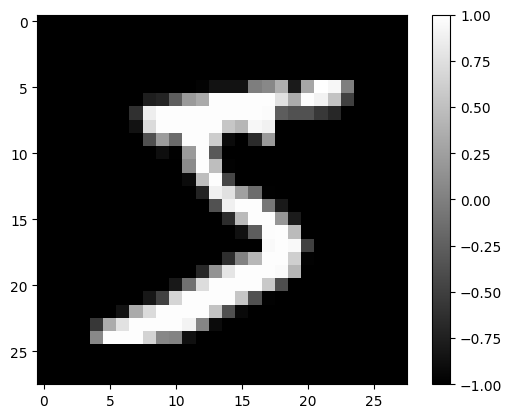

In [1]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import nn
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

preprocess = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
batch_size = 128
dataset = MNIST(root='', train=True, download=True, transform=preprocess)
loader_train = DataLoader(dataset, batch_size, shuffle=True)
plt.imshow(dataset[0][0].squeeze(), cmap='gray')
plt.colorbar()
plt.show()

### Exemple de prédiction d'un UNet conditionnel non entraîné sur MNIST

Input shape: torch.Size([1, 1, 28, 28])
Output shape: torch.Size([1, 1, 28, 28])


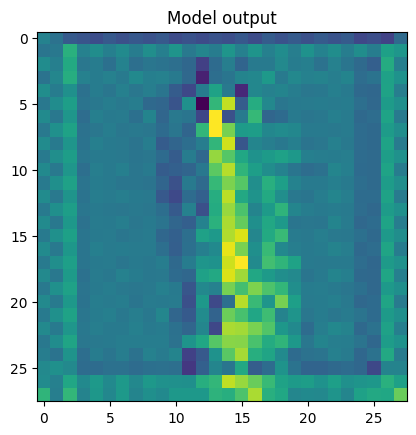

In [2]:
from unet import Conditional_UNet

model = Conditional_UNet(in_channels=1, out_channels=1, block_out_channels=[64, 128],)

sample_image, label = dataset[8]
sample_image = sample_image.unsqueeze(0)
print("Input shape:", sample_image.shape)
print("Output shape:", model(sample_image, torch.ones(1), torch.ones(1, dtype=torch.long)*label).shape)
plt.imshow(model(sample_image, torch.ones(1), torch.ones(1, dtype=torch.long)*label).squeeze().detach().numpy())
plt.title("Model output")
plt.show()

### Illustration de la forward diffusion et la backward diffusion

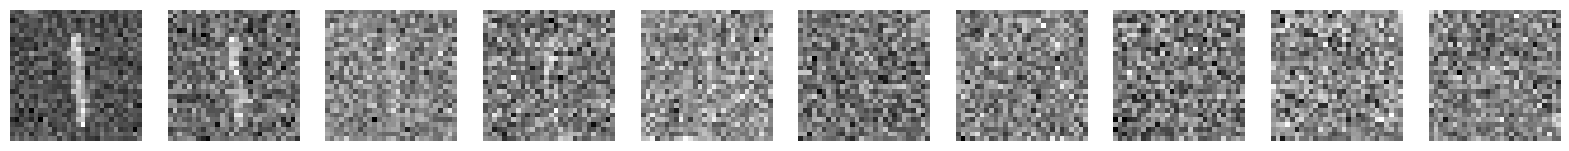

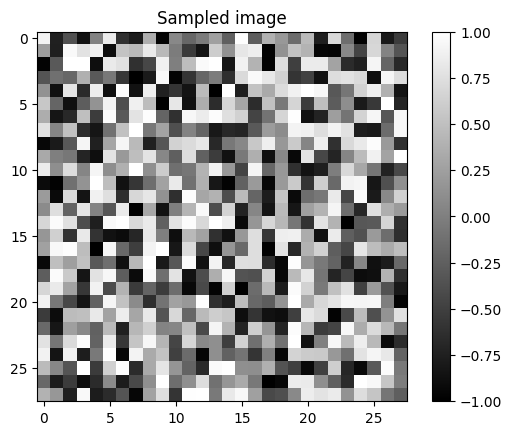

In [3]:
from ddpm import Conditional_DDPM
        
model = Conditional_DDPM(in_channels=1, out_channels=1, block_out_channels=[64, 128], device=device)
model.to(device)
sample_image, label = dataset[8]
sample_image = sample_image.unsqueeze(0).to(device)
noised_image, noise = model(sample_image, 1)

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i,t in enumerate([99, 199, 299, 399, 499, 599, 699, 799, 899, 999]):
    noised_image = model(sample_image, t)
    axes[i].imshow(noised_image[0].squeeze().detach().cpu().numpy(), cmap='gray')
    axes[i].axis('off')

output = model.sampling(1000, torch.LongTensor([label]).to(device), n_samples=1)
plt.figure()
plt.imshow(output.squeeze().detach().cpu().numpy(), cmap='gray')
plt.colorbar()
plt.title("Sampled image")
plt.show()

### Entraînement du modèle

Dans les affichages des générations effectuées par le modèle au cours de l'entraînement, celui-ci est conditionné à générer des images de la classe 1 (chiffre 1).

0it [00:00, ?it/s]

469it [00:17, 26.51it/s]


Epoch: 0, Loss: 0.5055656433105469


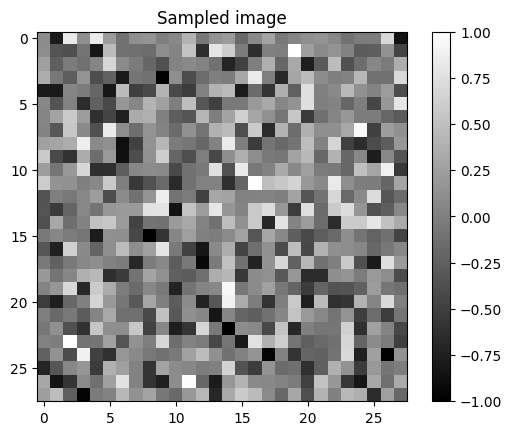

469it [00:16, 27.84it/s]


Epoch: 1, Loss: 0.39093461632728577


469it [00:16, 27.94it/s]


Epoch: 2, Loss: 0.24255502223968506


469it [00:16, 27.81it/s]


Epoch: 3, Loss: 0.1815338134765625


469it [00:16, 28.04it/s]


Epoch: 4, Loss: 0.12894822657108307


469it [00:16, 27.83it/s]


Epoch: 5, Loss: 0.14251132309436798


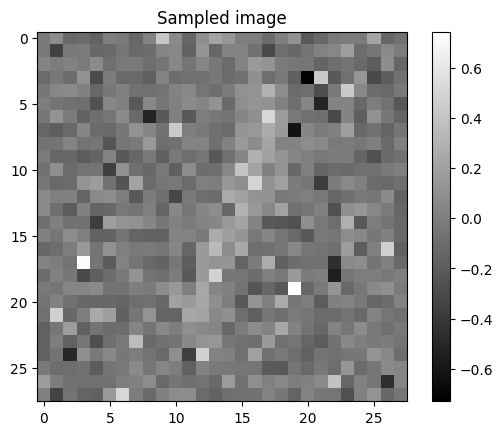

469it [00:16, 27.93it/s]


Epoch: 6, Loss: 0.07777843624353409


469it [00:16, 27.68it/s]


Epoch: 7, Loss: 0.059870582073926926


469it [00:16, 27.88it/s]


Epoch: 8, Loss: 0.09300266951322556


469it [00:16, 27.71it/s]


Epoch: 9, Loss: 0.04231675714254379


469it [00:16, 27.78it/s]


Epoch: 10, Loss: 0.08439923077821732


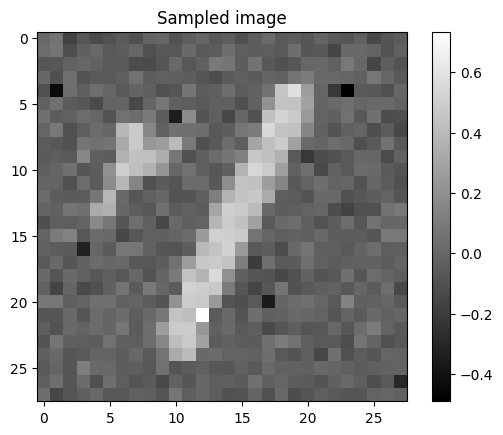

469it [00:16, 27.70it/s]


Epoch: 11, Loss: 0.027166716754436493


469it [00:17, 27.49it/s]


Epoch: 12, Loss: 0.034929513931274414


469it [00:16, 27.65it/s]


Epoch: 13, Loss: 0.015305346809327602


469it [00:16, 27.86it/s]


Epoch: 14, Loss: 0.05108531937003136


469it [00:16, 27.94it/s]


Epoch: 15, Loss: 0.014144204556941986


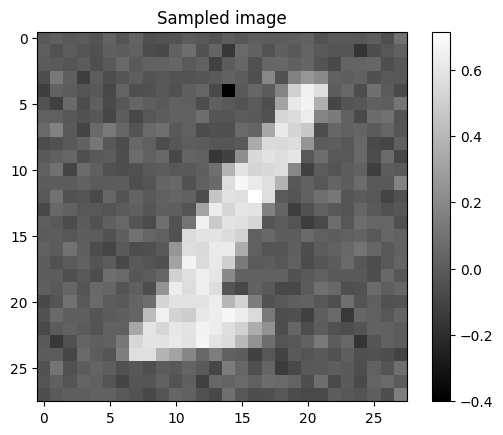

469it [00:16, 27.99it/s]


Epoch: 16, Loss: 0.006532616447657347


469it [00:16, 27.88it/s]


Epoch: 17, Loss: 0.0229258444160223


469it [00:16, 27.84it/s]


Epoch: 18, Loss: 0.06792113929986954


469it [00:16, 27.83it/s]


Epoch: 19, Loss: 0.016015803441405296


469it [00:16, 27.82it/s]


Epoch: 20, Loss: 0.0050369384698569775


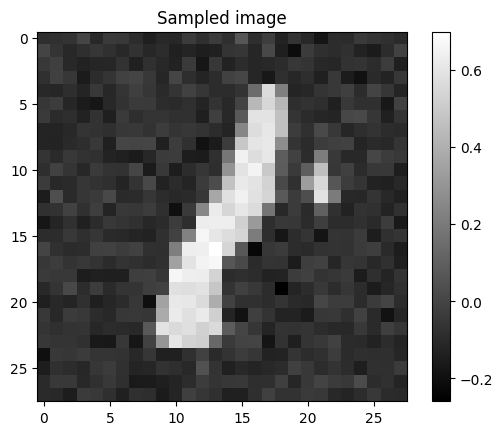

469it [00:16, 27.95it/s]


Epoch: 21, Loss: 0.04196447134017944


469it [00:16, 27.95it/s]


Epoch: 22, Loss: 0.04902990534901619


469it [00:16, 27.92it/s]


Epoch: 23, Loss: 0.002529811579734087


469it [00:16, 27.85it/s]


Epoch: 24, Loss: 0.0018570136744529009


469it [00:16, 27.82it/s]


Epoch: 25, Loss: 0.009585223160684109


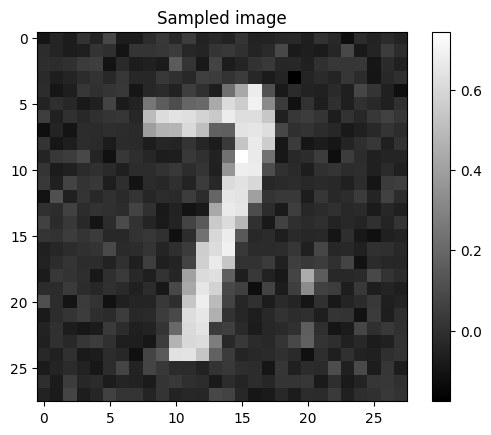

469it [00:16, 27.82it/s]


Epoch: 26, Loss: 0.08173230290412903


469it [00:16, 28.01it/s]


Epoch: 27, Loss: 0.03292812407016754


469it [00:16, 27.76it/s]


Epoch: 28, Loss: 0.0013012903509661555


469it [00:16, 27.82it/s]


Epoch: 29, Loss: 0.07016294449567795


469it [00:16, 27.86it/s]


Epoch: 30, Loss: 0.047783154994249344


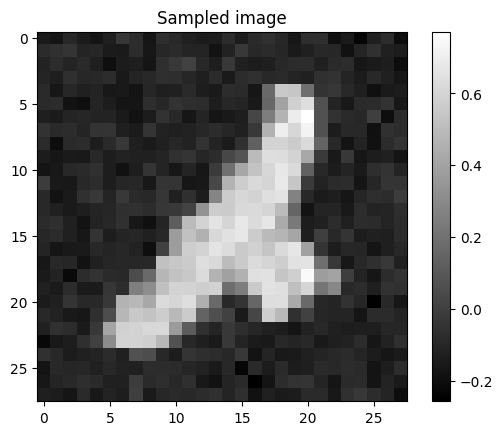

469it [00:17, 27.28it/s]


Epoch: 31, Loss: 0.0006982345948927104


469it [00:18, 25.86it/s]


Epoch: 32, Loss: 0.02511228434741497


469it [00:17, 27.30it/s]


Epoch: 33, Loss: 0.08456700295209885


469it [00:17, 27.34it/s]


Epoch: 34, Loss: 0.019837582483887672


469it [00:17, 26.79it/s]


Epoch: 35, Loss: 0.009069549851119518


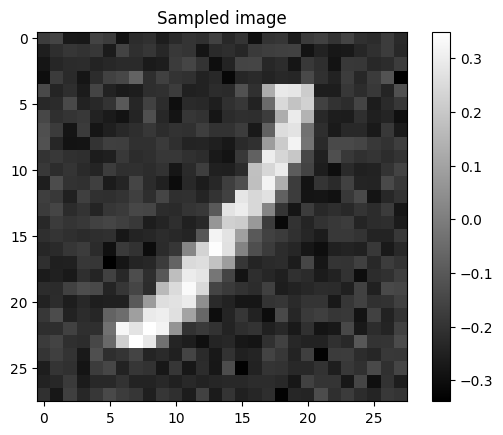

469it [00:17, 26.95it/s]


Epoch: 36, Loss: 0.031832460314035416


469it [00:17, 26.91it/s]


Epoch: 37, Loss: 0.0004602616827469319


469it [00:17, 27.30it/s]


Epoch: 38, Loss: 0.005085105542093515


469it [00:17, 27.36it/s]


Epoch: 39, Loss: 0.0006107045919634402


469it [00:17, 27.27it/s]


Epoch: 40, Loss: 0.029973043128848076


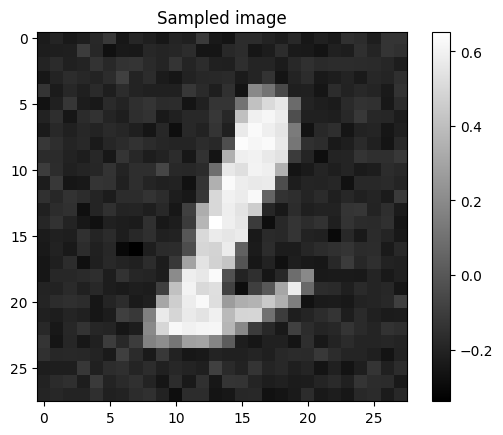

469it [00:17, 27.30it/s]


Epoch: 41, Loss: 0.0643036887049675


469it [00:17, 27.34it/s]


Epoch: 42, Loss: 0.028546510264277458


469it [00:17, 27.47it/s]


Epoch: 43, Loss: 0.0013719318667426705
Epoch 00044: reducing learning rate of group 0 to 5.0000e-04.


469it [00:17, 27.06it/s]


Epoch: 44, Loss: 0.03396046534180641


469it [00:17, 27.23it/s]


Epoch: 45, Loss: 0.00040853602695278823


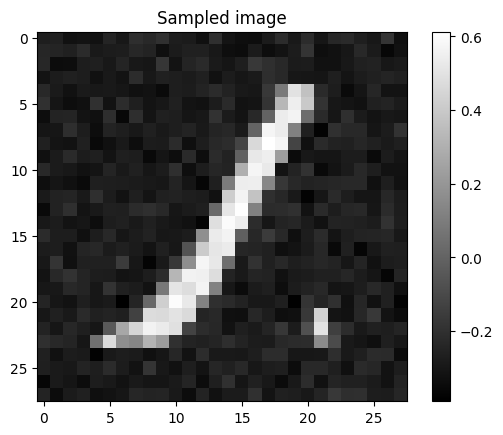

469it [00:17, 26.32it/s]


Epoch: 46, Loss: 0.029463602229952812


469it [00:17, 26.50it/s]


Epoch: 47, Loss: 0.0004955935874022543


469it [00:17, 26.37it/s]


Epoch: 48, Loss: 0.022375622764229774


469it [00:18, 25.78it/s]


Epoch: 49, Loss: 0.00043063340126536787


469it [00:17, 26.17it/s]


Epoch: 50, Loss: 0.018391482532024384


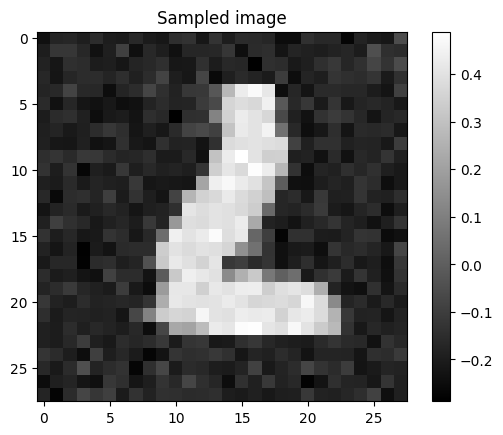

469it [00:17, 26.96it/s]


Epoch: 51, Loss: 0.011448711156845093
Epoch 00052: reducing learning rate of group 0 to 2.5000e-04.


469it [00:17, 27.05it/s]


Epoch: 52, Loss: 0.007669022306799889


469it [00:17, 26.98it/s]


Epoch: 53, Loss: 0.0033131949603557587


469it [00:17, 26.90it/s]


Epoch: 54, Loss: 0.020058071240782738


469it [00:17, 27.02it/s]


Epoch: 55, Loss: 0.01102382317185402


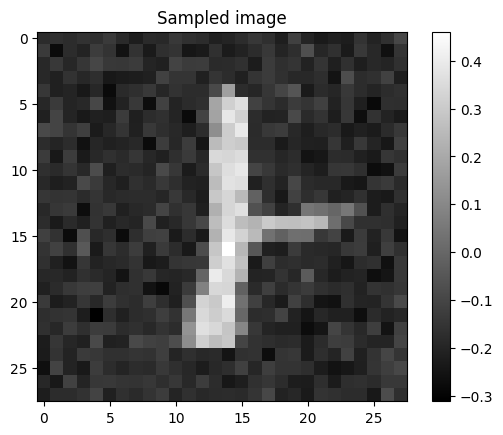

469it [00:17, 26.99it/s]


Epoch: 56, Loss: 0.014308677986264229


469it [00:17, 27.02it/s]


Epoch: 57, Loss: 0.004949913360178471
Epoch 00058: reducing learning rate of group 0 to 1.2500e-04.


469it [00:17, 26.79it/s]


Epoch: 58, Loss: 0.0007386585348285735


469it [00:17, 27.10it/s]


Epoch: 59, Loss: 0.0005460077663883567


469it [00:17, 27.06it/s]


Epoch: 60, Loss: 0.0025075471494346857


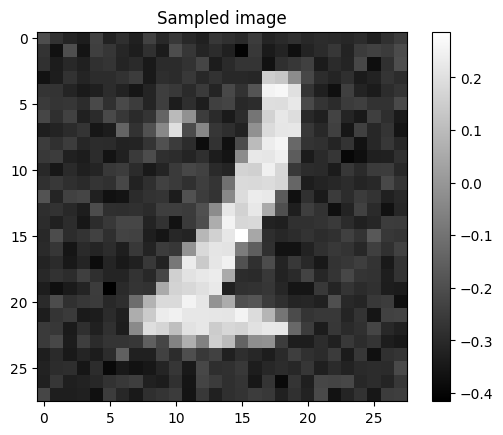

469it [00:17, 27.09it/s]


Epoch: 61, Loss: 0.02455594576895237


469it [00:17, 27.13it/s]


Epoch: 62, Loss: 0.06048686429858208


469it [00:17, 27.08it/s]


Epoch: 63, Loss: 0.018268577754497528
Epoch 00064: reducing learning rate of group 0 to 6.2500e-05.


469it [00:17, 27.05it/s]


Epoch: 64, Loss: 0.0006614751764573157


469it [00:17, 27.09it/s]


Epoch: 65, Loss: 0.01876726560294628


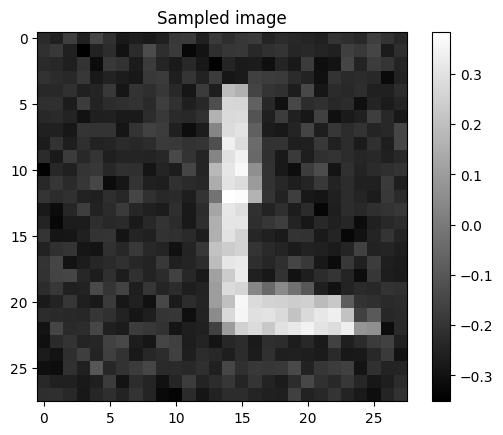

469it [00:17, 27.11it/s]


Epoch: 66, Loss: 0.0004495688481256366


469it [00:17, 27.15it/s]


Epoch: 67, Loss: 0.00034399639116600156


469it [00:17, 27.06it/s]


Epoch: 68, Loss: 0.011200066655874252


469it [00:17, 27.04it/s]


Epoch: 69, Loss: 0.028053801506757736


469it [00:17, 27.04it/s]


Epoch: 70, Loss: 0.03236136585474014


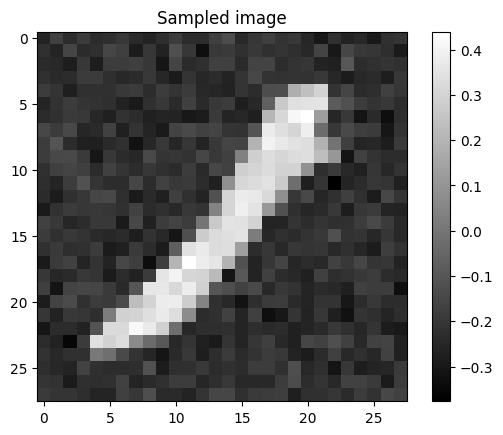

469it [00:17, 27.00it/s]


Epoch: 71, Loss: 0.031857624650001526


469it [00:17, 26.85it/s]


Epoch: 72, Loss: 0.03029347024857998


469it [00:17, 27.17it/s]


Epoch: 73, Loss: 0.04151163250207901
Epoch 00074: reducing learning rate of group 0 to 3.1250e-05.


469it [00:17, 26.89it/s]


Epoch: 74, Loss: 0.00313057703897357


469it [00:17, 27.05it/s]


Epoch: 75, Loss: 0.01983177848160267


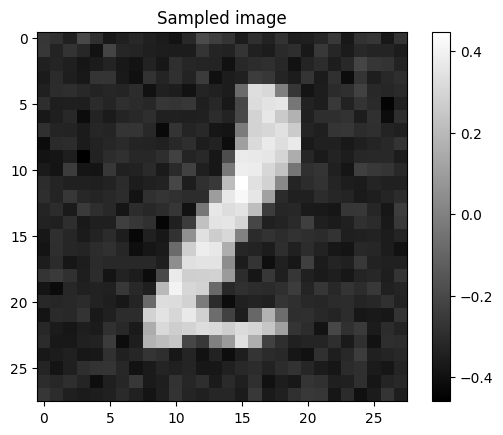

469it [00:17, 27.04it/s]


Epoch: 76, Loss: 0.0005582765443250537


469it [00:17, 27.01it/s]


Epoch: 77, Loss: 0.0012983394553884864


469it [00:17, 26.83it/s]


Epoch: 78, Loss: 0.02116667851805687


469it [00:17, 26.70it/s]

Epoch: 79, Loss: 0.055180735886096954
Epoch 00080: reducing learning rate of group 0 to 1.5625e-05.


In [4]:
from random import randint, random
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

def training(model, epochs, criterion, optimizer, loader_train, T = 1000, p_label = 0.1, patience=5):
    '''Training loop for the model.
    model: model to be trained.
    lr: learning rate.
    epochs: number of epochs.
    criterion: loss function.
    optimizer: optimizer to be used.
    loader_train: training data loader
    p_label: probability of discarding conditional labels.'''
    scheduler = ReduceLROnPlateau(optimizer, 'min', patience=patience, verbose=True, factor=0.5, min_lr=1e-6)
    for epoch in range(epochs):
        for i, (images, labels) in tqdm(enumerate(loader_train)):
            images = images.to(device)
            labels = labels.to(device)
            t = randint(0, T-1)
            x_noised, noise = model.forward(images, t)
            optimizer.zero_grad()
            if random() > p_label:
                noise_pred = model.model(x_noised, t, torch.ones(len(labels), dtype=torch.int, device=device)*labels)
            else:
                noise_pred = model.model(x_noised, t, None)
            loss = criterion(noise_pred, noise)
            loss.backward()
            optimizer.step()
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
        if epoch % 5 == 0:
            with torch.no_grad():
                img = model.sampling(1000, c=1, n_samples=2, w=1.0)
                plt.imshow(img[0].squeeze().detach().cpu().numpy(), cmap='gray')
                plt.colorbar()
                plt.title("Sampled image")
                plt.show()
        scheduler.step(loss)
    return model

lr = 1e-3
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
patience = 5
epochs = 80
model = training(model, epochs, criterion, optimizer, loader_train, p_label=0.1, patience=patience)


### Génération d'images

Le modèle est entraîné pour générer des images. On peut choisir la classe $c$ de l'image à générer et on a un hyper-paramètre de $guidance$ $strength$ ($w$). Plus $w$ est grand, plus l'image générée est proche de la classe choisie.

3it [00:28,  9.35s/it]


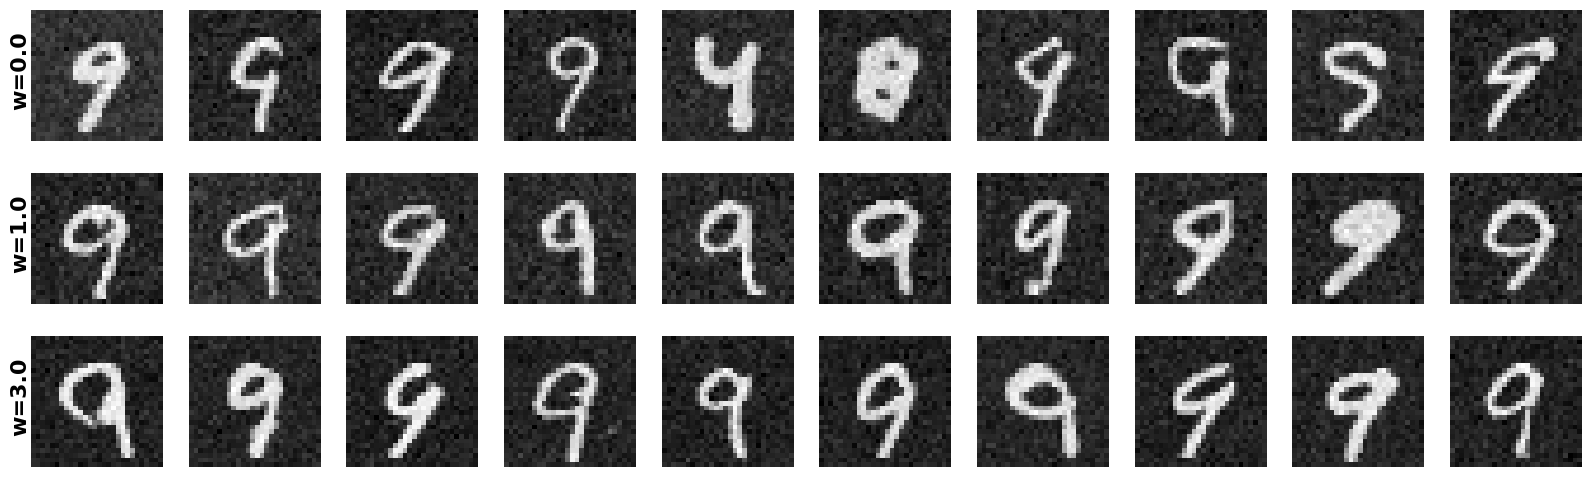

In [34]:
n_samples = 10
guidance_strength = [0.0, 1.0, 3.0]
fig, axes = plt.subplots(len(guidance_strength), n_samples, figsize=((n_samples*2), len(guidance_strength)*2))
for j, w in tqdm(enumerate(guidance_strength)):
    samples = model.sampling(1000, c=9, n_samples=n_samples, w=w)
    axes[j, 0].text(-5, 20, f"w={w}", fontsize=16,  weight='bold', rotation=90)
    for i in range(n_samples):
        with torch.no_grad():
            axes[j,i].imshow(samples[i].squeeze().detach().cpu().numpy(), cmap='gray')
            axes[j,i].axis('off')
